In [247]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from kneed import KneeLocator

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

df = pd.read_csv("data/Crop_recommendation.csv")
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

<AxesSubplot:>

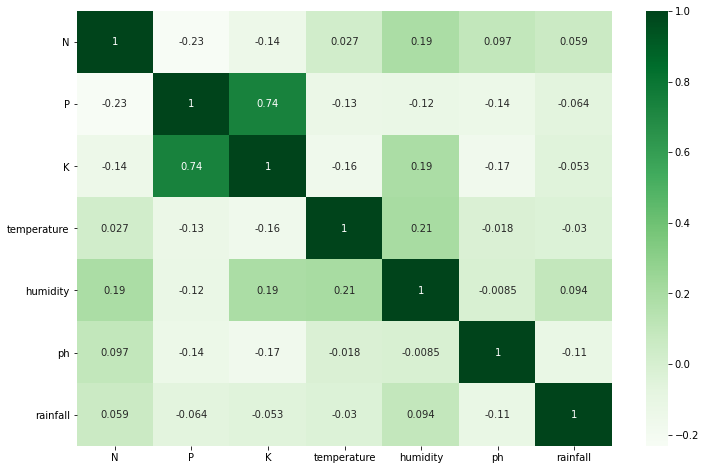

In [248]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)

In [331]:
#scaling and encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = df.drop(['label'], axis=1)

#sclaing the X
st_scaler = StandardScaler()
st_scaler.fit(X)
scaledX = st_scaler.transform(X)
scaledX = pd.DataFrame(scaledX)
scaledX.columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = scaledX
print("##scaled features")
print(scaledX)
print()
#encoding the y by label encoder
y = df[['label']]
label_encoder = LabelEncoder()
label_encoder.fit(y)
label_encodedY = label_encoder.transform(y)
label_encodedY = pd.DataFrame(label_encodedY)
label_encodedY.columns = ['label']
print("##encoded label")
print(label_encodedY)
print()
print("##the number of the unique values in label")
label_encodedY.nunique()


##scaled features
             N         P         K  temperature  humidity        ph  rainfall
0     1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361
1     0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058
2     0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066
3     0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048
4     0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373
...        ...       ...       ...          ...       ...       ...       ...
2195  1.529390 -0.587134 -0.318922     0.228814 -0.227709  0.401395  1.352437
2196  1.312641 -1.163269 -0.417666     0.355720 -0.666947 -0.494413  0.445183
2197  1.827421 -0.617457 -0.358420    -0.293218 -0.191235 -0.138120  1.271418
2198  1.800327 -0.647780 -0.279425     0.129612 -0.869518  0.373904  0.431545
2199  1.448109 -1.072300 -0.358420    -0.397667 -0.498020  0.401096  0.682005

[2200 rows x 7 columns]

##encoded label
    

label    22
dtype: int64

##these are the centers
           0         1         2         3         4         5         6
0   1.204266 -1.193592  0.036553  0.200898  0.576663  0.117560 -0.858026
1   1.285547 -0.951009 -0.022693  0.682734  0.918001 -0.165528 -1.358208
2   0.255986  0.049647 -0.160933 -0.122713  0.785091  0.721539  0.874131
3   0.824954 -0.405197 -0.062190  0.028977  0.416942 -0.053962  1.292972
4  -0.611012 -0.223259 -0.634901  0.669988  0.605565  0.251638 -1.047458
5  -0.881949 -1.041977 -0.378168  0.390615  0.943603 -0.340418  1.080692
6   1.502297 -0.223259 -0.555906 -0.430219  0.321317 -0.347404 -0.406089
7   0.472736  0.140616 -0.200431 -0.472538  0.518962 -0.172180  2.142936
8   1.962890 -0.435519 -0.476912 -0.120233  0.300904  1.271226 -0.316667
9   0.147611  0.140616  0.016804  2.274604  1.038955  0.287783  1.256057
10 -0.881949  0.110293 -0.536157  0.347717 -0.338856 -0.405246 -0.982602
11  0.310174 -0.041322 -0.634901 -0.659933 -0.567939  0.643063 -0.720590
12  0.987516 -0.162613 -0.2

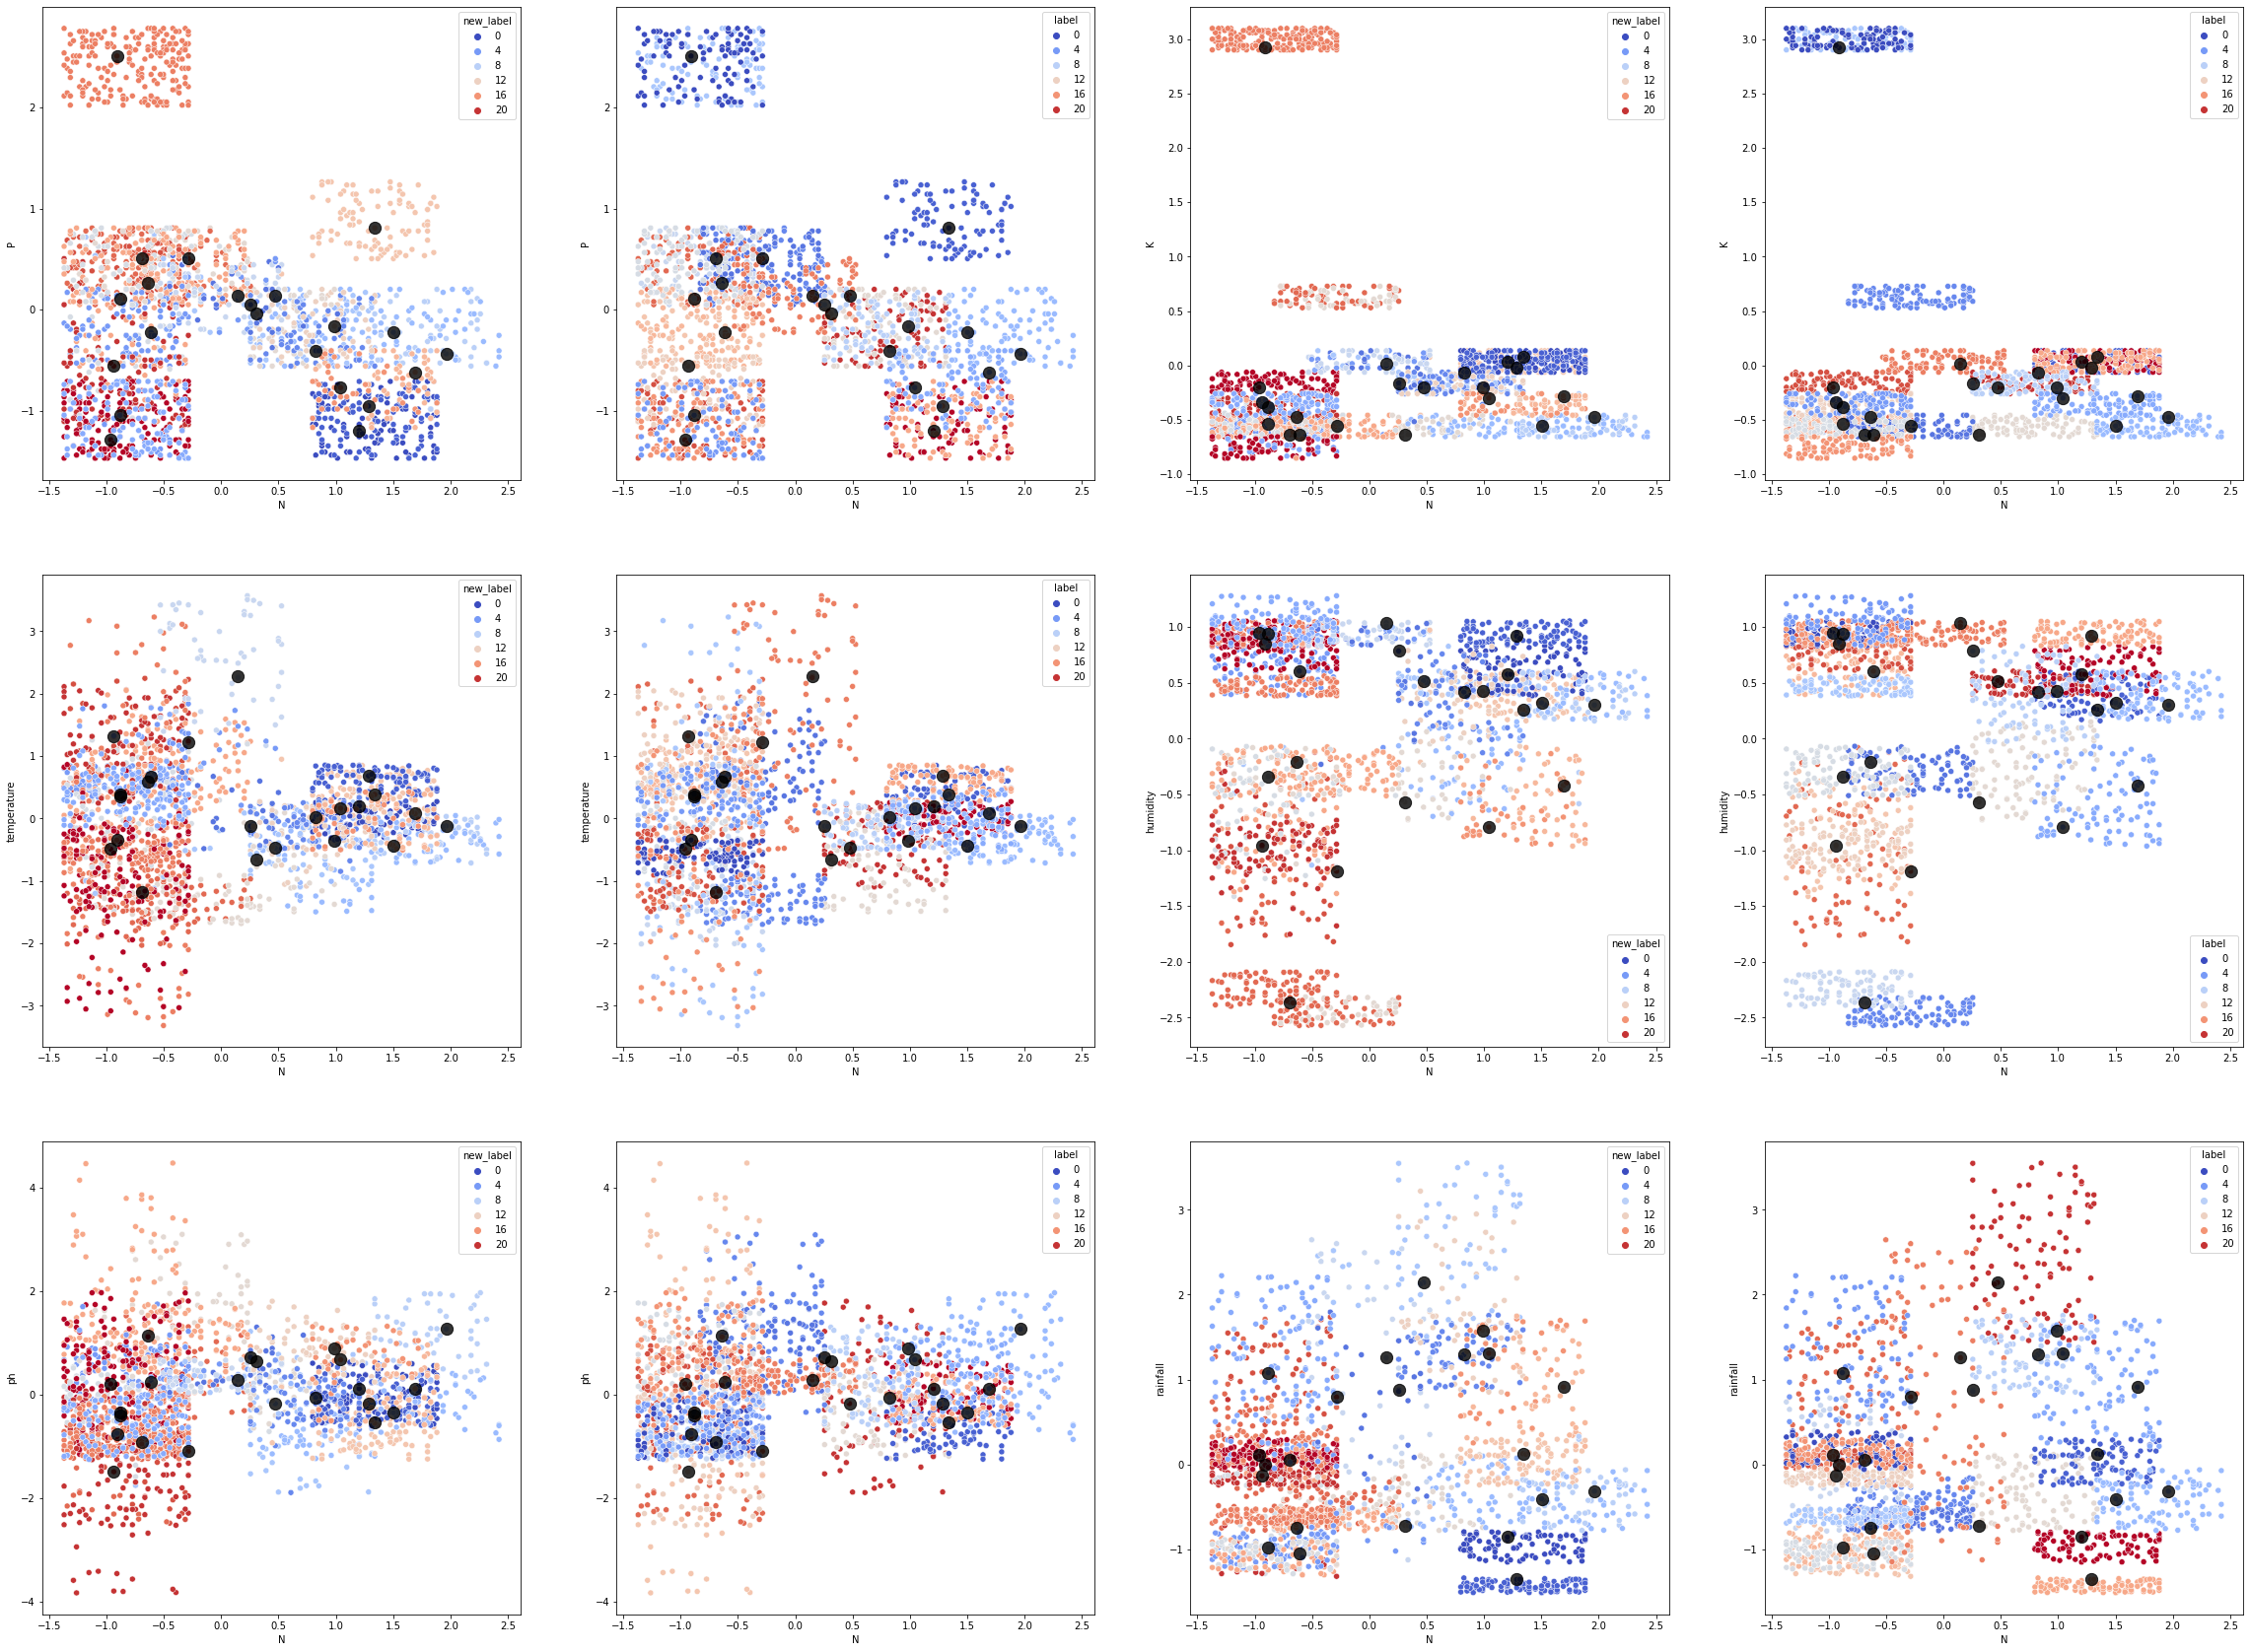

In [333]:
#clustering by the K-medoids
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=22, random_state = 10).fit(X)
dfcopy = X.copy()
pred = kmedoids.predict(dfcopy)
centers = kmedoids.cluster_centers_
dfcopy['new_label'] = kmedoids.labels_
print("##these are the centers")
print(pd.DataFrame(centers))

plt.figure(figsize=(40,30))

#compare real label and new label
#new label
plt.subplot(3,4,1)
sns.scatterplot(x=dfcopy.iloc[:,0], y=dfcopy.iloc[:,1], data=[dfcopy], hue=dfcopy['new_label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

#real label
plt.subplot(3,4,2)
sns.scatterplot(x=dfcopy.iloc[:,0], y=dfcopy.iloc[:,1], data=[dfcopy], hue=label_encodedY['label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

#new label
plt.subplot(3,4,3)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=[dfcopy], hue=dfcopy['new_label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)
#real label
plt.subplot(3,4,4)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=[dfcopy], hue=label_encodedY['label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

#new label
plt.subplot(3,4,5)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=[dfcopy], hue=dfcopy['new_label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)
#real label
plt.subplot(3,4,6)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=[dfcopy], hue=label_encodedY['label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)
    
#new label
plt.subplot(3,4,7)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,4], data=[dfcopy], hue=dfcopy['new_label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,4], c='black', alpha=0.8, s=150)
#real label
plt.subplot(3,4,8)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,4], data=[dfcopy], hue=label_encodedY['label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,4], c='black', alpha=0.8, s=150)

#new label
plt.subplot(3,4,9)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,5], data=[dfcopy], hue=dfcopy['new_label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,5], c='black', alpha=0.8, s=150)
#real label
plt.subplot(3,4,10)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,5], data=[dfcopy], hue=label_encodedY['label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,5], c='black', alpha=0.8, s=150)

#new label
plt.subplot(3,4,11)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,6], data=[dfcopy], hue=dfcopy['new_label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,6], c='black', alpha=0.8, s=150)
#real label
plt.subplot(3,4,12)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,6], data=[dfcopy], hue=label_encodedY['label'], palette='coolwarm')
plt.scatter(centers[:,0], centers[:,6], c='black', alpha=0.8, s=150)

plt.show()


In [334]:
#silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette(df):
    average_score=silhouette_score(df,df['new_label'])
    return average_score

In [344]:
#silhouette score for the clustering
print("silhouette score of the cluster when k = 22 : ",silhouette(dfcopy))

silhouette score of the cluster when k = 22 :  0.5137319248069677


In [342]:
#purity
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [346]:
#purity of the clustering
print("purity of the clustering: ", purity_score(label_encodedY['label'], dfcopy['new_label']))

purity of the clustering:  0.69
